___
# Initialization
___

In [66]:
# jupyter server
import openmc
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(os.environ['PATH']) # check that openmc/bin is in the PATH
# removes the old input files 
!rm *.xml
# removes the old output files 
!rm *.h5
!rm *.out
!rm *.png

/bin:/home/nucleon/herth-joh/.vscode-server/bin/863d2581ecda6849923a2118d93a088b0745d9d6/bin/remote-cli:/home/nucleon/herth-joh/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/soft_snc/OpenMC/v0.14.0/install_neutro/bin:/home/nucleon/herth-joh/.vscode-server/bin/863d2581ecda6849923a2118d93a088b0745d9d6/bin/remote-cli:/home/nucleon/herth-joh/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/soft_snc/OpenMC/v0.14.0/install_neutro/bin


rm: cannot remove '*.h5': No such file or directory
rm: cannot remove '*.out': No such file or directory


In [67]:
import subprocess

commande = "openmc --version"
resultat = subprocess.run(commande, shell=True, capture_output=True, text=True)
print(resultat.stdout)

OpenMC version 0.14.0
Git SHA1: fa2330103de61a864c958d1a7250f11e5dd91468
Copyright (c) 2011-2023 MIT, UChicago Argonne LLC, and contributors
MIT/X license at <https://docs.openmc.org/en/latest/license.html>
Build type:            RelWithDebInfo
Compiler ID:           GNU 11.4.0
MPI enabled:           no
Parallel HDF5 enabled: no
PNG support:           yes
DAGMC support:         no
libMesh support:       no
MCPL support:          no
NCrystal support:      no
Coverage testing:      no
Profiling flags:       no



___
# XS datalib
___

In [68]:
# Load XS datalib 
xs_xml_file = '/soft_snc/OpenMC/datalib/endfb-vii.1-hdf5/cross_sections.xml'
# xs_xml_file = '/nuclear_data/cross_sections.xml'
# xs_xml_file = '/root/nndc_hdf5/cross_sections.xml'
openmc.config['cross_sections'] = xs_xml_file
xs_library_file = Path(xs_xml_file)
with xs_library_file.open() as file:
    contenu_xml = file.read()
    print(contenu_xml)

<?xml version='1.0' encoding='utf-8'?>
<cross_sections>
  <library materials="H1" path="neutron/H1.h5" type="neutron" />
  <library materials="H2" path="neutron/H2.h5" type="neutron" />
  <library materials="H3" path="neutron/H3.h5" type="neutron" />
  <library materials="He3" path="neutron/He3.h5" type="neutron" />
  <library materials="He4" path="neutron/He4.h5" type="neutron" />
  <library materials="Li6" path="neutron/Li6.h5" type="neutron" />
  <library materials="Li7" path="neutron/Li7.h5" type="neutron" />
  <library materials="Be7" path="neutron/Be7.h5" type="neutron" />
  <library materials="Be9" path="neutron/Be9.h5" type="neutron" />
  <library materials="B10" path="neutron/B10.h5" type="neutron" />
  <library materials="B11" path="neutron/B11.h5" type="neutron" />
  <library materials="C0" path="neutron/C0.h5" type="neutron" />
  <library materials="N14" path="neutron/N14.h5" type="neutron" />
  <library materials="N15" path="neutron/N15.h5" type="neutron" />
  <library mat

___
# Materials 
___

In [69]:
# MATERIALS 
U_C1_mat = openmc.Material(material_id=1, name='Uranyl fluoride (C1) [U(4.95)O2F2 (H/235U) = 410]')
U_C1_mat.add_nuclide('U235', 1.3173E-4, 'ao')
U_C1_mat.add_nuclide('U238', 2.5342E-3, 'ao')
U_C1_mat.add_nuclide('O16',  3.1989E-2, 'ao')
U_C1_mat.add_nuclide('F19',  5.3345E-3, 'ao')
U_C1_mat.add_nuclide('H1',   5.3314E-2, 'ao')
U_C1_mat.add_s_alpha_beta('c_H_in_H2O') 
U_C1_mat.set_density('sum') # when ‘sum’ is used, the values that you enter are for add_nuclide are assumed to be in units of atom/b-cm.
# case_1

reg_concrete_mat = openmc.Material(material_id=2, name='Regulatory Concrete')
reg_concrete_mat.add_nuclide('H1',   1.37433E-02, 'ao')
reg_concrete_mat.add_nuclide('O16',  4.60690E-02, 'ao')
reg_concrete_mat.add_nuclide('Na23', 1.74720E-03, 'ao')
reg_concrete_mat.add_nuclide('Al27', 1.74538E-03, 'ao')
reg_concrete_mat.add_nuclide('Si28', 1.53273E-02, 'ao')
reg_concrete_mat.add_nuclide('Si29', 7.78639E-04, 'ao')
reg_concrete_mat.add_nuclide('Si30', 5.13885E-04, 'ao')
reg_concrete_mat.add_nuclide('Ca40', 1.47412E-03, 'ao')
reg_concrete_mat.add_nuclide('Ca42', 9.83851E-06, 'ao')
reg_concrete_mat.add_nuclide('Ca43', 2.05286E-06, 'ao')
reg_concrete_mat.add_nuclide('Ca44', 3.17205E-05, 'ao')
reg_concrete_mat.add_nuclide('Ca46', 6.08254E-08, 'ao')
reg_concrete_mat.add_nuclide('Ca48', 2.84359E-06, 'ao')
reg_concrete_mat.add_nuclide('Fe54', 2.02958E-05, 'ao')
reg_concrete_mat.add_nuclide('Fe56', 3.18600E-04, 'ao')
reg_concrete_mat.add_nuclide('Fe57', 7.35787E-06, 'ao')
reg_concrete_mat.add_nuclide('Fe58', 9.79198E-07, 'ao')
reg_concrete_mat.set_density('sum') 
# If you want to specify nuclide atom fractions exactly, then you can give them in atom/b-cm and list the density as units=“sum”
# concrete

air_mat = openmc.Material(material_id=3, name='Air')
air_mat.add_nuclide('N14', 4.0000e-05, 'ao')
air_mat.add_nuclide('O16', 1.1100e-05, 'ao')
air_mat.set_density('sum') 
# air

materials = openmc.Materials([U_C1_mat, reg_concrete_mat, air_mat])
materials.export_to_xml()

# for nuc, atombcm in case_1.get_nuclide_atom_densities().values(): 
for nuc, atombcm in U_C1_mat.get_nuclide_atom_densities().items(): 
    print(f'{nuc} = {atombcm:.4e} atom/b-cm') 

U235 = 1.3173e-04 atom/b-cm
U238 = 2.5342e-03 atom/b-cm
O16 = 3.1989e-02 atom/b-cm
F19 = 5.3345e-03 atom/b-cm
H1 = 5.3314e-02 atom/b-cm


/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Material instance already exists with id=1.

/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Material instance already exists with id=2.

/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Material instance already exists with id=3.



___
# Geometry
___

In [70]:
def calc_sphere_volume(radius):
    return (4/3) * np.pi * radius**3

def calc_sphere_radius(volume):
    return ((3 * volume) / (4 * np.pi)) ** (1/3)

r_crit_C1 = 25.5476 # Rayon de la sphère critique
V_crit_C1 = calc_sphere_volume(r_crit_C1) # Volume total de la sphère critique

# Calculer les volumes progressifs et les rayons correspondants
N_equivol = 20
V_equivol_C1 = [(V_crit_C1 / N_equivol) * i for i in range(1, N_equivol+1)]
r_equivol_C1 = [calc_sphere_radius(volume) for volume in V_equivol_C1]
r_equivol_C1.insert(0, 0.0) # Ajouter la valeur 0 au début de r_equivol_C1

# Afficher les rayons progressifs
for i, rayon in enumerate(r_equivol_C1, start=1):
    print(f"R{i} = {rayon:.5f} cm.")

R1 = 0.00000 cm.
R2 = 9.41182 cm.
R3 = 11.85815 cm.
R4 = 13.57419 cm.
R5 = 14.94033 cm.
R6 = 16.09398 cm.
R7 = 17.10241 cm.
R8 = 18.00416 cm.
R9 = 18.82363 cm.
R10 = 19.57737 cm.
R11 = 20.27714 cm.
R12 = 20.93169 cm.
R13 = 21.54768 cm.
R14 = 22.13033 cm.
R15 = 22.68382 cm.
R16 = 23.21154 cm.
R17 = 23.71629 cm.
R18 = 24.20043 cm.
R19 = 24.66594 cm.
R20 = 25.11451 cm.
R21 = 25.54760 cm.


/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Surface instance already exists with id=100.



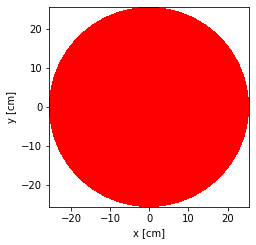

In [71]:
# GEOMETRY DEFINITIONS
# Surfaces
surface_sphere = openmc.Sphere(x0=0.0, y0=0.0, z0=100.0, r=r_crit_C1, boundary_type='vacuum', surface_id = 100)
# Regions
region_sphere = -surface_sphere
# Cells
cell_sphere = openmc.Cell(region=region_sphere)
cell_sphere.fill = U_C1_mat 
# Universe
universe = openmc.Universe(cells=[cell_sphere])
#Geometry
geometry = openmc.Geometry(universe)
lower_left, upper_right = geometry.bounding_box
geometry.export_to_xml()

# note the new color scheme is uses material objects as dictionary keys and not not cell objects
color_assignment = {U_C1_mat: 'red', air_mat: 'white', reg_concrete_mat: 'gray'}

# note the additional argument color_by, normally this defaults to 'cell'
plot = geometry.plot(basis='xy', color_by='material', colors=color_assignment, outline = False)
plot.figure.savefig('xy-material.png')

___
# Tallies
___

In [72]:
# TALLIES 
# Instantiate an empty Tallies object
tallies = openmc.Tallies()

# Filters
cell_filter_sphere = openmc.CellFilter(cell_sphere)
surface_filter_sphere = openmc.SurfaceFilter(bins=100)

# Energy filter using group structure
print(openmc.mgxs.GROUP_STRUCTURES.keys())
energy_groups = openmc.mgxs.GROUP_STRUCTURES['CCFE-709']
energy_filter = openmc.EnergyFilter(energy_groups)

# Spherical mesh 
sphere_mesh = openmc.SphericalMesh(
    r_grid =     r_equivol_C1,
    phi_grid =   [0, 2*np.pi],
    theta_grid = [0, np.pi],
    origin = (0.0, 0.0, 100.0))
sphere_mesh_filter = openmc.MeshFilter(sphere_mesh)

# Regular mesh 
regular_mesh = openmc.RegularMesh()
regular_mesh.dimension   = [100, 100]
regular_mesh.lower_left  = [-r_crit_C1, -r_crit_C1]
regular_mesh.upper_right = [r_crit_C1, r_crit_C1]
regular_mesh_filter = openmc.MeshFilter(regular_mesh)

# ___ Tally_1 ___
# Fission rate sph-mesh tally
tally_1 = openmc.Tally(name='spherical_mesh_tally', tally_id=1)
tally_1.filters = [sphere_mesh_filter]
tally_1.scores = ['fission'] #  fission reaction rate [fission/source particle]
tallies.append(tally_1)

# ___ Tally_2 ___
# fission rate (cell tally) by nuclides
tally_2 = openmc.Tally(name='nuclide_tally', tally_id=2)
tally_2.scores = ['fission']
tally_2.nuclides = ['U235', 'U238']
tallies.append(tally_2)

# ___ Tally_3 ___
# regular mesh flux tally
tally_3 = openmc.Tally(name='regular_mesh_flux', tally_id=3)
tally_3.filters = [regular_mesh_filter, cell_filter_sphere]
tally_3.scores = ['flux']
tallies.append(tally_3)

# ___ Tally_4 ___
tally_4 = openmc.Tally(name='neutron flux spectrum', tally_id=4)
tally_4.scores = ['flux']
tally_4.multiply_density = False
tally_4.filters = [cell_filter_sphere, energy_filter]
tallies.append(tally_4)

# ___ Tally_5 ___
# regular mesh flux tally https://docs.openmc.org/en/stable/usersguide/tallies.html
tally_5 = openmc.Tally(name='reaction rates', tally_id=5)
tally_5.scores = ['total', 'fission', 'nu-fission', 'absorption']
tallies.append(tally_5)

# ___ Tally_6 ___
tally_6 = openmc.Tally(name='neutron [current] leakage spectrum', tally_id=6)
tally_6.filters = [surface_filter_sphere, energy_filter]
tally_6.multiply_density = False
tally_6.scores = ['current'] # particles per source particle
tallies.append(tally_6)


tallies.export_to_xml()

dict_keys(['CASMO-2', 'CASMO-4', 'CASMO-8', 'CASMO-16', 'CASMO-25', 'CASMO-40', 'VITAMIN-J-42', 'SCALE-44', 'MPACT-51', 'MPACT-60', 'MPACT-69', 'CASMO-70', 'XMAS-172', 'VITAMIN-J-175', 'SCALE-252', 'TRIPOLI-315', 'SHEM-361', 'CCFE-709', 'UKAEA-1102', 'ECCO-1968'])


/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Tally instance already exists with id=1.

/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Tally instance already exists with id=2.

/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Tally instance already exists with id=3.

/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Tally instance already exists with id=4.

/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Tally instance already exists with id=5.

/usr/local/lib/python3.10/dist-packages/openmc/mixin.py:70: IDWarning:

Another Tally instance already exists with id=6.



___
# Settings
___

In [73]:
#SIMULATION SETTINGS
# Instantiate a Settings object
settings = openmc.Settings()

# Source
# Create an initial uniform spatial source distribution over fissionable zones
uniform_dist = openmc.stats.Box(lower_left, upper_right, only_fissionable=True)
settings.source = openmc.IndependentSource(space=uniform_dist)

# Run options
settings.run_mode = 'eigenvalue'
settings.particles = 20000 #5000
settings.generations_per_batch = 10 
settings.batches = 100 #200
settings.inactive = 50
settings.output = {'tallies': True}

settings.trigger_active = True
settings.trigger_batch_interval = 5
settings.trigger_max_batches = 1000
settings.keff_trigger = {'type': 'std_dev', 'threshold': 0.00050}  

settings.surf_source_write = {'surface_ids': [100], 'max_particles': settings.particles}

# see https://openmc.discourse.group/t/source-custom-file/1613 + https://openmc.discourse.group/t/surf-source-write-not-populating-source-bank/4013

settings.export_to_xml()

___
# Run 
___

In [74]:
# RUN OpenMC
model = openmc.model.Model(geometry, materials, settings, tallies)
sp_filename = model.run(output=True)

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

___
# Analysis
___

## Fission source
https://docs.openmc.org/en/latest/usersguide/processing.html <br>
12.3. Source Site Processing <br>
For eigenvalue problems, OpenMC will store information on the fission source sites in the statepoint file by default. <br>
For each source site, the weight, position, sampled direction, and sampled energy are stored. <br>
To extract this data from a statepoint file, the openmc.statepoint module can be used. <br>
An example notebook demontrates how to analyze and plot source information.<br>
https://nbviewer.org/github/openmc-dev/openmc-notebooks/blob/main/post-processing.ipynb

In [75]:
# Source Sites
# https://docs.openmc.org/en/latest/io_formats/source.html
# https://nbviewer.org/github/openmc-dev/openmc-notebooks/blob/main/post-processing.ipynb
statepoints = glob.glob('statepoint.*.h5')
sp = openmc.StatePoint(statepoints[-1])
print(sp.source_present)
sources = sp.source
print(sources)
print(sources.dtype)
sp.source['r']


True
[(( 7.71822284, -1.72461409,  95.3502431 ), (-0.87712818, -0.11299158, -0.46677516),  370199.4089656 , 0.03732258, 1., 0, 0, 0)
 (( 7.71822284, -1.72461409,  95.3502431 ), ( 0.04862895, -0.67459624, -0.73658342), 1320796.02088747, 0.03732258, 1., 0, 0, 0)
 ((17.40688409, 14.791878  ,  93.85307009), ( 0.59671155, -0.15722355, -0.78690284), 3594438.72319895, 0.03739451, 1., 0, 0, 0)
 ...
 ((11.13035899, -6.52663361, 104.12694427), ( 0.04037533, -0.13156844, -0.99048452), 1247016.66161808, 0.03842012, 1., 0, 0, 0)
 ((13.67811279,  2.73974806,  79.6859984 ), ( 0.98392706,  0.13191433,  0.12035847), 1187985.87198574, 0.03841634, 1., 0, 0, 0)
 ((13.67811279,  2.73974806,  79.6859984 ), ( 0.66489113, -0.41865675, -0.61858412), 3228905.93220425, 0.03841634, 1., 0, 0, 0)]
{'names': ['r', 'u', 'E', 'time', 'wgt', 'delayed_group', 'surf_id', 'particle'], 'formats': [[('x', '<f8'), ('y', '<f8'), ('z', '<f8')], [('x', '<f8'), ('y', '<f8'), ('z', '<f8')], '<f8', '<f8', '<f8', '<i4', '<i4', '<i4

array([( 7.71822284, -1.72461409,  95.3502431 ),
       ( 7.71822284, -1.72461409,  95.3502431 ),
       (17.40688409, 14.791878  ,  93.85307009), ...,
       (11.13035899, -6.52663361, 104.12694427),
       (13.67811279,  2.73974806,  79.6859984 ),
       (13.67811279,  2.73974806,  79.6859984 )],
      dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [76]:
# Write source to h5 file
source_particles = []
for src in sources:
    particle = openmc.SourceParticle()
    # Assurez-vous que les données sont dans le bon format
    position_tuple = tuple(src['r'])
    direction_tuple = tuple(src['u'])
    particle.position = openmc.stats.Point(position_tuple)
    particle.direction = direction_tuple
    particle.energy = src['E']
    particle.time = src['time']
    particle.weight = src['wgt']
    particle.delayed_group = src['delayed_group']
    particle.surface_id = src['surf_id']
    particle_type = (src['particle'])  # Convertit de numpy.int32 à int natif Python

    source_particles.append(particle)

# Écrire le fichier source
openmc.write_source_file(source_particles, 'U_C1_KCODE_source.h5')

0.9999999999999999


Text(0, 0.5, 'Probability/eV')

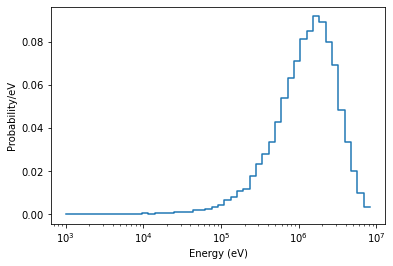

In [77]:
# Now, we can look at things like the energy distribution of source sites. Note that we don't directly use the matplotlib.pyplot.hist method since our binning is logarithmic.

# Create log-spaced energy bins from 1 keV to 10 MeV
energy_bins = np.logspace(3,7)

# Calculate pdf for source energies
probability, bin_edges = np.histogram(sp.source['E'], energy_bins, density=True)

# Make sure integrating the PDF gives us unity
print(sum(probability*np.diff(energy_bins)))

# Plot source energy PDF
plt.semilogx(energy_bins[:-1], probability*np.diff(energy_bins), drawstyle='steps')
plt.xlabel('Energy (eV)')
plt.ylabel('Probability/eV')

(-25.5476, 25.5476)

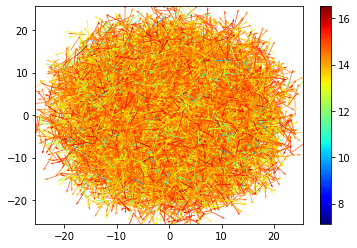

In [78]:
plt.quiver(sp.source['r']['x'], sp.source['r']['y'],
           sp.source['u']['x'], sp.source['u']['y'],
           np.log(sp.source['E']), cmap='jet', scale=15.0)
plt.colorbar()
plt.xlim((-r_crit_C1,r_crit_C1))
plt.ylim((-r_crit_C1,r_crit_C1))

## Surface source leakage current 
write / read source file  
https://docs.openmc.org/en/latest/pythonapi/generated/openmc.Settings.html  
https://docs.openmc.org/en/latest/pythonapi/generated/openmc.read_source_file.html  

In [79]:
import h5py

source_file = h5py.File('surface_source.h5')
particles = source_file['source_bank'][()]
source_part_nrj = particles['E']
# print(particles['E'])      # <-- Array of all particle energies
# print(particles['r'])      # <-- 2D array of all particle positions
# print(particles['r']['x'])  # <-- Array of all x coordinates
# print(len(source_part_nrj))


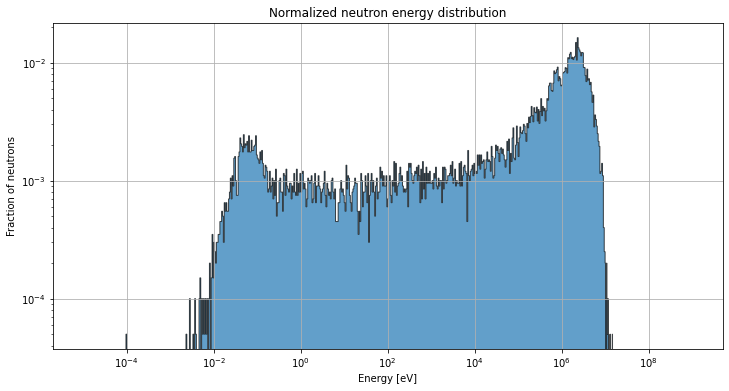

In [80]:
# Calculate the weights to normalize the histogram
total_neutrons = len(source_part_nrj)  # Total number of simulated source neutrons
weights = np.ones_like(source_part_nrj) / total_neutrons  # Weights for each neutron

# Plot the normalized histogram
plt.figure(figsize=(12, 6))
plt.hist(source_part_nrj, bins=energy_groups, weights=weights, edgecolor='black', histtype='stepfilled', alpha=0.7, density= False)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [eV]')
plt.ylabel('Fraction of neutrons')  # Updated to reflect normalization
plt.title('Normalized neutron energy distribution')  # Updated to indicate normalization
plt.grid(True)
plt.show()

## Tally_1

In [81]:
with openmc.StatePoint(sp_filename) as sp:
    t1 = sp.get_tally(id=1)
    df_t1 = t1.get_pandas_dataframe()
print(t1)
df_t1['mean_normalized'] = df_t1['mean'] / df_t1['mean'].sum()
df_t1['std. dev. normalized'] = (df_t1['std. dev.'] / df_t1['mean']) * df_t1['mean_normalized']
df_t1

Tally
	ID             =	1
	Name           =	spherical_mesh_tally
	Filters        =	MeshFilter
	Nuclides       =	total
	Scores         =	['fission']
	Estimator      =	tracklength
	Multiply dens. =	True


mesh 5       nuclide    score     mean std. dev. mean_normalized  \
        x  y  z                                                       
0       1  1  1   total  fission 5.00e-02  9.72e-05        1.22e-01   
1       2  1  1   total  fission 4.33e-02  5.88e-05        1.05e-01   
2       3  1  1   total  fission 3.85e-02  4.69e-05        9.39e-02   
3       4  1  1   total  fission 3.47e-02  4.41e-05        8.46e-02   
4       5  1  1   total  fission 3.14e-02  3.75e-05        7.66e-02   
5       6  1  1   total  fission 2.84e-02  3.04e-05        6.93e-02   
6       7  1  1   total  fission 2.58e-02  3.00e-05        6.29e-02   
7       8  1  1   total  fission 2.33e-02  3.22e-05        5.68e-02   
8       9  1  1   total  fission 2.11e-02  2.89e-05        5.13e-02   
9      10  1  1   total  fission 1.90e-02  2.63e-05        4.63e-02   
10     11  1  1   total  fission 1.70e-02  2.81e-05        4.15e-02   
11     12  1  1   total  fission 1.52e-02  2.20e-05        3.70e-02   
12     13  1  1   total  fission 1.34e-02  1.93e-05        3.27e-02   
13     14  1  1   total  fission 1.17e-02  1.63e-05        2.86e-02   
14     15  1  1   total  fission 1.01e-02  1.61e-05        2.47e-02   
15     16  1  1   total  fission 8.54e-03  1.47e-05        2.08e-02   
16     17  1  1   total  fission 7.02e-03  1.31e-05        1.71e-02   
17     18  1  1   total  fission 5.50e-03  1.12e-05        1.34e-02   
18     19  1  1   total  fission 3.95e-03  8.40e-06        9.64e-03   
19     20  1  1   total  fission 2.29e-03  5.26e-06        5.59e-03   

   std. dev. normalized  
                         
0              2.37e-04  
1              1.43e-04  
2              1.14e-04  
3              1.07e-04  
4              9.15e-05  
5              7.42e-05  
6              7.31e-05  
7              7.85e-05  
8              7.04e-05  
9              6.41e-05  
10             6.85e-05  
11             5.38e-05  
12             4.71e-05  
13             3.98e-05  
14             3.92e-05  
15             3.59e-05  
16             3.19e-05  
17             2.73e-05  
18             2.05e-05  
19             1.28e-05

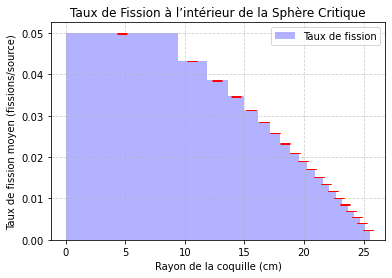

In [82]:
# Calcul des largeurs des bins pour l'histogramme en soustrayant les rayons consécutifs
bin_widths = np.diff(r_equivol_C1)

# Création de l'histogramme
plt.bar(r_equivol_C1[:-1], df_t1['mean'], width=bin_widths, align='edge', yerr=df_t1['std. dev.'], 
        capsize=5, ecolor='red', color='blue', alpha=0.3, label='Taux de fission')

# Mise en forme du graphique
plt.xlabel('Rayon de la coquille (cm)')
plt.ylabel('Taux de fission moyen (fissions/source)')
plt.title('Taux de Fission à l’intérieur de la Sphère Critique')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Tally_2

In [83]:
with openmc.StatePoint(sp_filename) as sp:
    t2 = sp.get_tally(id=2)
    df_t2 = t2.get_pandas_dataframe()
print(t2)
df_t2['mean_normalized'] = df_t2['mean'] / df_t2['mean'].sum()
df_t2['std. dev. normalized'] = (df_t2['std. dev.'] / df_t2['mean']) * df_t2['mean_normalized']

df_t2.head()

Tally
	ID             =	2
	Name           =	nuclide_tally
	Filters        =	
	Nuclides       =	U235 U238
	Scores         =	['fission']
	Estimator      =	tracklength
	Multiply dens. =	True


,nuclide,score,mean,std. dev.,mean_normalized,std. dev. normalized
0,U235,fission,0.403509,0.000182,0.983879,0.000443
1,U238,fission,0.006612,0.000003,0.016121,0.000008


## Tally_3

In [84]:
with openmc.StatePoint(sp_filename) as sp:
    t3 = sp.get_tally(id=3)
    df_t3 = t3.get_pandas_dataframe()
print(t3)
df_t3.loc[df_t3['mean'].idxmax()]

Tally
	ID             =	3
	Name           =	regular_mesh_flux
	Filters        =	MeshFilter, CellFilter
	Nuclides       =	total
	Scores         =	['flux']
	Estimator      =	tracklength
	Multiply dens. =	True


mesh 6     x          49
           y          51
           z           1
cell                   3
nuclide            total
score               flux
mean            0.008348
std. dev.        0.00003
Name: 5048, dtype: object

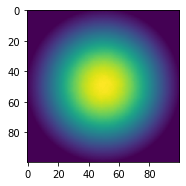

In [85]:
flux = t3.get_slice(scores=['flux'])
flux.std_dev.shape = (100, 100)
flux.mean.shape = (100, 100)
fig = plt.subplot(121)
fig.imshow(flux.mean)

## Tally_4
https://github.com/openmc-dev/openmc-notebooks/blob/main/flux-spectrum.ipynb

In [86]:
with openmc.StatePoint(sp_filename) as sp:
    t4 = sp.get_tally(id=4)
    df_t4 = t4.get_pandas_dataframe()
    flux_mean_t4 = t4.mean.ravel() # .ravel() Return a flattened array.
    flux_unc_t4 = t4.std_dev.ravel()
print(t4)
print(df_t4['mean'].sum()) 

Tally
	ID             =	4
	Name           =	neutron flux spectrum
	Filters        =	CellFilter, EnergyFilter
	Nuclides       =	total
	Scores         =	['flux']
	Estimator      =	tracklength
	Multiply dens. =	False
25.78322234334062


Note that we divide by the energy bin width so that integrating the curve makes sense.   
This appropriately highlights the fact that most of the spectrum is thermal.

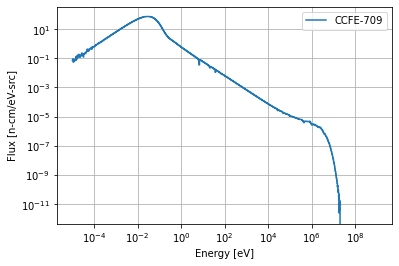

In [87]:
fig, ax = plt.subplots()
ax.step(energy_groups[:-1], flux_mean_t4/np.diff(energy_groups), where='post', label='CCFE-709')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Flux [n-cm/eV-src]')
ax.grid()
ax.legend()

If we don't divide by the energy bin width, we obtain a plot where the different curves aren't directly comparable.

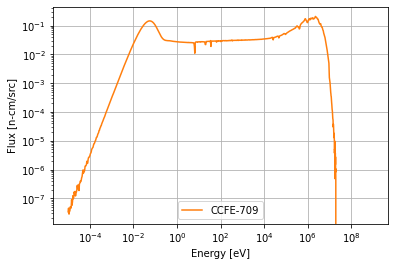

In [88]:
fig, ax = plt.subplots()
ax.loglog(energy_groups[:-1], flux_mean_t4, '-', color='C1', label='CCFE-709')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Flux [n-cm/src]')
ax.grid()
ax.legend()

## Tally_5

In [89]:
statepoints = glob.glob('statepoint.*.h5')
sp = openmc.StatePoint(statepoints[-1])
tally_5 = sp.get_tally(id=5)
df_t5 = tally_5.get_pandas_dataframe()
sp.close()
nu_bar = df_t5[df_t5['score'] == 'nu-fission']['mean'].values[0] / df_t5[df_t5['score'] == 'fission']['mean'].values[0]
print(f'Average prompt neutron emission multiplicity, Nu-bar = {nu_bar:.4f}.') 
df_t5


Average prompt neutron emission multiplicity, Nu-bar = 2.4433.


,nuclide,score,mean,std. dev.
0,total,total,31.307147,0.009414
1,total,fission,0.410121,0.000182
2,total,nu-fission,1.002047,0.000445
3,total,absorption,0.711175,0.000301


## Tally_6

In [90]:
with openmc.StatePoint(sp_filename) as sp:
    t6 = sp.get_tally(id=6)
    df_t6 = t6.get_pandas_dataframe()
    current_mean_t6 = t6.mean.ravel()
    current_unc_t6 = t6.std_dev.ravel()
print(t6)

Tally
	ID             =	6
	Name           =	neutron [current] leakage spectrum
	Filters        =	SurfaceFilter, EnergyFilter
	Nuclides       =	total
	Scores         =	['current']
	Estimator      =	analog
	Multiply dens. =	False


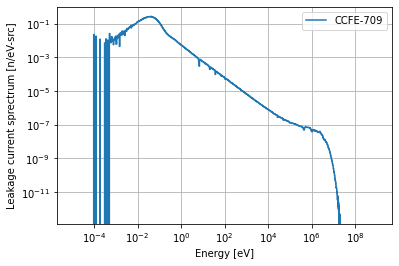

In [91]:
fig, ax = plt.subplots()
ax.step(energy_groups[:-1], current_mean_t6/np.diff(energy_groups), where='post', label='CCFE-709')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Leakage current sprectrum [n/eV-src]')
ax.grid()
ax.legend()

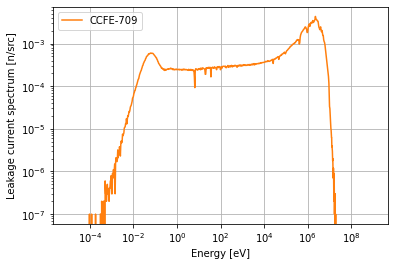

In [92]:
fig, ax = plt.subplots()
ax.loglog(energy_groups[:-1], current_mean_t6, '-', color='C1', label='CCFE-709')
ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Leakage current spectrum [n/src]')
ax.grid()
ax.legend()

https://openmc.discourse.group/t/normalizing-tally-to-get-flux-value/99/18  
https://openmc.discourse.group/t/question-on-openmc-fixed-source-calculation/243/2  
https://docs.openmc.org/en/latest/io_formats/source.html  
https://mcnp.lanl.gov/pdf_files/TechReport_2012_LANL_LA-UR-12-25545_Kiedrowski.pdf  
https://www.ornl.gov/file/guide-performing-computational-analysis-criticality-accident-alarm-systems/display  
https://info.ornl.gov/sites/publications/Files/Pub165483.pdf
